In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/ColorClassification/orange/6.jpg
/kaggle/input/dataset/ColorClassification/orange/5.jpg
/kaggle/input/dataset/ColorClassification/orange/8.jpg
/kaggle/input/dataset/ColorClassification/orange/10.jpg
/kaggle/input/dataset/ColorClassification/orange/9.jpg
/kaggle/input/dataset/ColorClassification/orange/1.jpg
/kaggle/input/dataset/ColorClassification/orange/7.jpg
/kaggle/input/dataset/ColorClassification/orange/4.jpg
/kaggle/input/dataset/ColorClassification/orange/3.jpg
/kaggle/input/dataset/ColorClassification/orange/2.jpg
/kaggle/input/dataset/ColorClassification/yellow/6.jpg
/kaggle/input/dataset/ColorClassification/yellow/5.jpg
/kaggle/input/dataset/ColorClassification/yellow/8.jpg
/kaggle/input/dataset/ColorClassification/yellow/10.jpg
/kaggle/input/dataset/ColorClassification/yellow/9.jpg
/kaggle/input/dataset/ColorClassification/yellow/1.jpg
/kaggle/input/dataset/ColorClassification/yellow/7.jpg
/kaggle/input/dataset/ColorClassification/yellow/4.jpg
/kaggle/

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random

In [10]:
# Set the data directory and categories for classification
DATADIR = '/kaggle/input/dataset'
CATEGORIES = ['orange', 'Violet', 'red', 'Blue', 'Green', 'Black', 'Brown', 'White']

In [11]:
# Set the data directory and categories for classification
DATADIR = '/kaggle/input/dataset/ColorClassification'
CATEGORIES = ['orange', 'Violet', 'red', 'Blue', 'Green', 'Black', 'Brown', 'White']

Displaying images from category: orange


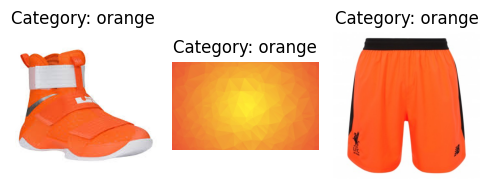

Displaying images from category: Violet


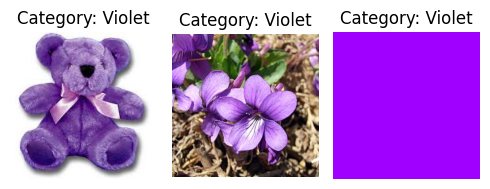

Displaying images from category: red


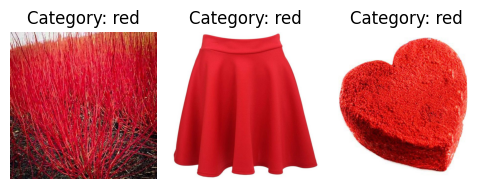

Displaying images from category: Blue


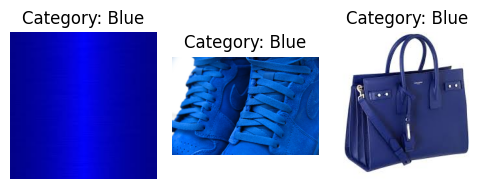

Displaying images from category: Green


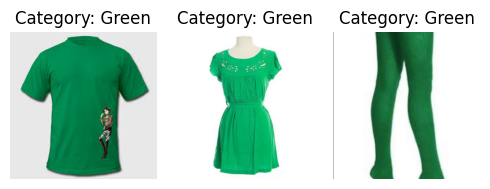

Displaying images from category: Black


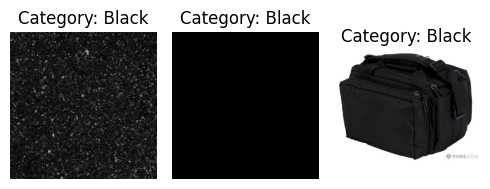

Displaying images from category: Brown


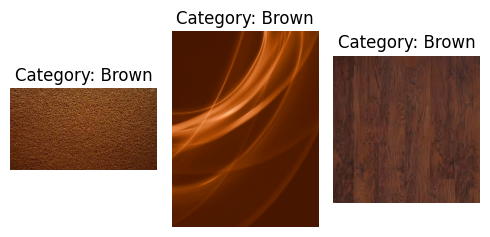

Displaying images from category: White


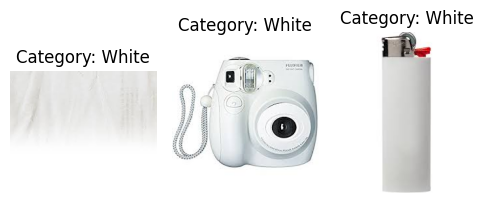

In [15]:
# EDA: Display a few raw images before preprocessing
def display_raw_images(num_images_per_category=3):
    # Iterate through each category
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # Construct the path for the category
        if not os.path.exists(path):  # Check if the directory exists
            print(f"Directory {path} does not exist!")  # Print a message if the directory is missing
            continue  # Skip to the next category if the directory is not found

        print(f"Displaying images from category: {category}")  # Indicate which category is being displayed
        # Randomly select images, ensuring not to exceed the available number of images
        images = random.sample(os.listdir(path), min(num_images_per_category, len(os.listdir(path))))
        
        # Create subplots for displaying images
        fig, axes = plt.subplots(1, num_images_per_category, figsize=(5, 4))

        # Iterate over axes and selected images to display them
        for ax, img in zip(axes, images):  
            img_array = cv2.imread(os.path.join(path, img))  # Read the image file
            if img_array is not None:  # Check if the image was loaded successfully
                ax.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB and display the image
                ax.set_title(f"Category: {category}")  # Set the title for the subplot
                ax.axis('off')  # Hide the axes for better visualization

        plt.tight_layout()  # Adjust the layout to prevent overlapping
        plt.show()  # Display the images

# Call the function to display 3 images per category
display_raw_images(3)

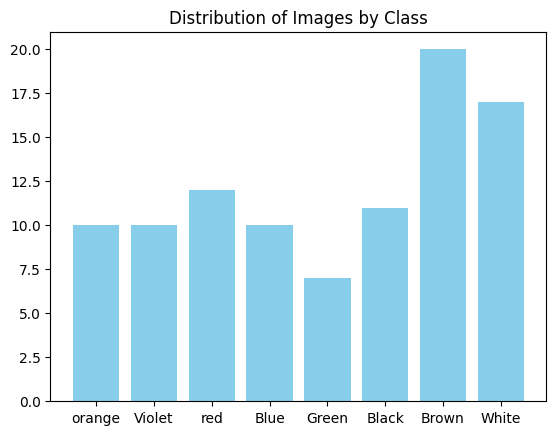

In [16]:
# EDA: Plot distribution of images by class
def plot_class_distribution():
    # Create a dictionary with category names as keys and the count of images as values
    class_counts = {category: len(os.listdir(os.path.join(DATADIR, category))) for category in CATEGORIES}
    
    # Create a bar plot with category names on the x-axis and counts on the y-axis
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')  
    
    # Set the title of the plot
    plt.title('Distribution of Images by Class')  
    
    # Display the plot
    plt.show()  

# Call the function to plot class distribution
plot_class_distribution()

In [17]:
# Check for Missing or Corrupt Images
def check_missing_images():
    missing_images = 0  # Initialize a counter for missing or corrupt images

    # Loop through each category in CATEGORIES
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # Construct the path to the category directory

        # Loop through each image in the category directory
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))  # Read the image
            
            # Check if the image was not loaded correctly
            if img_array is None:
                print(f"Missing or corrupt image: {os.path.join(path, img)}")  # Print the path of the missing/corrupt image
                missing_images += 1  # Increment the counter

    # Print the total number of missing or corrupt images found
    print(f"Total missing/corrupt images: {missing_images}")

# Call the function to check for missing images
check_missing_images()

Total missing/corrupt images: 0


Category: orange
Image: 6.jpg - Height: 199, Width: 300
Image: 1.jpg - Height: 225, Width: 225
Image: 7.jpg - Height: 864, Width: 1440


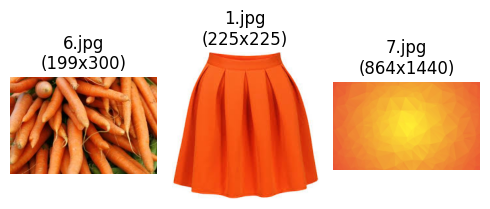

Category: Violet
Image: 10.jpg - Height: 244, Width: 206
Image: 8.jpg - Height: 800, Width: 800
Image: 1.jpg - Height: 238, Width: 243


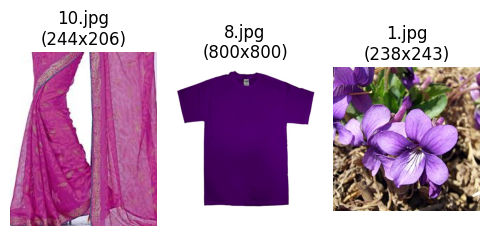

Category: red
Image: 4.jpg - Height: 183, Width: 275
Image: 2.jpg - Height: 292, Width: 220
Image: 8.jpg - Height: 376, Width: 250


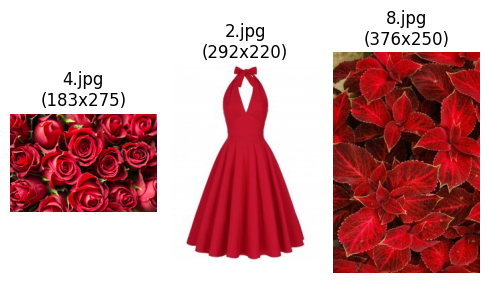

Category: Blue
Image: 8.jpg - Height: 627, Width: 940
Image: 4.jpg - Height: 208, Width: 242
Image: 9.jpg - Height: 500, Width: 326


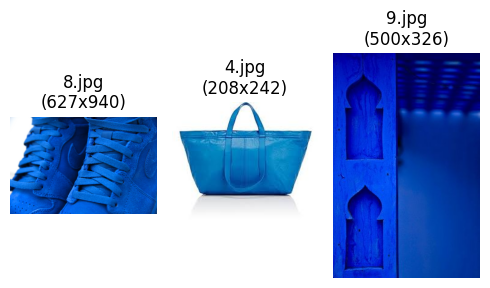

Category: Green
Image: 5.jpg - Height: 228, Width: 221
Image: 3.jpg - Height: 510, Width: 340
Image: 4.jpg - Height: 225, Width: 225


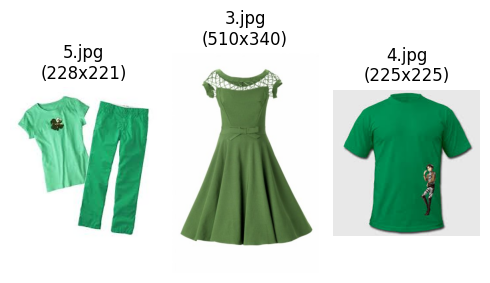

Category: Black
Image: 10.jpg - Height: 194, Width: 259
Image: 12.jpg - Height: 691, Width: 736
Image: 4.jpg - Height: 300, Width: 300


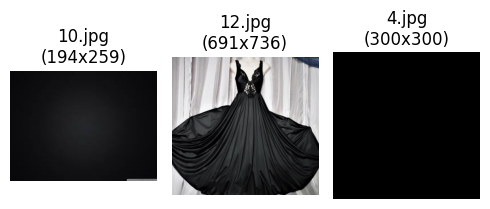

Category: Brown
Image: 6.jpg - Height: 177, Width: 284
Image: 8.jpg - Height: 1080, Width: 1920
Image: 12.jpg - Height: 168, Width: 300


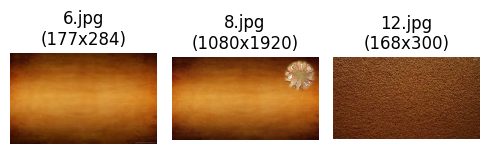

Category: White
Image: 13.jpg - Height: 168, Width: 300
Image: 14.jpg - Height: 413, Width: 620
Image: 11.jpg - Height: 177, Width: 284


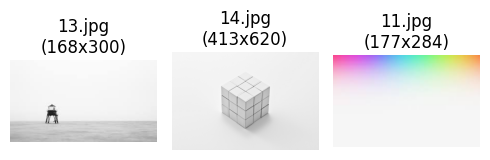

In [22]:
# Function to print image sizes - height, width and display images side by side
def print_and_display_images(num_images_per_category=3):
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # Construct path to the category directory
        
        print(f"Category: {category}")  # Print the category name
        
        # Get the list of images and shuffle for randomness
        images = os.listdir(path)  # List all images in the category
        selected_images = random.sample(images, min(num_images_per_category, len(images)))  # Select random images

        # Create subplots
        fig, axes = plt.subplots(1, num_images_per_category, figsize=(5, 5))  # Create a subplot for images
        
        for ax, img in zip(axes, selected_images):  # Loop through the selected images
            img_path = os.path.join(path, img)  # Full path to the image
            img_array = cv2.imread(img_path)  # Read the image
            
            if img_array is not None:  # Check if the image was loaded correctly
                height, width, _ = img_array.shape  # Get height and width (ignore channels)
                print(f"Image: {img} - Height: {height}, Width: {width}")  # Print image size
                
                # Convert BGR to RGB
                img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                
                # Display the image
                ax.imshow(img_rgb)  # Show the image in the subplot
                ax.set_title(f"{img}\n({height}x{width})")  # Set the title to include the size
                ax.axis('off')  # Hide axes
            else:
                print(f"Could not load image: {img_path}")  # Handle missing/corrupt images

        plt.tight_layout()  # Adjust layout
        plt.show()  # Show the images

# Call the function to print image sizes and display images
print_and_display_images(3)

Category: orange
Image: 7.jpg - Brightness: 168.41
Image: 8.jpg - Brightness: 212.70
Image: 6.jpg - Brightness: 115.12


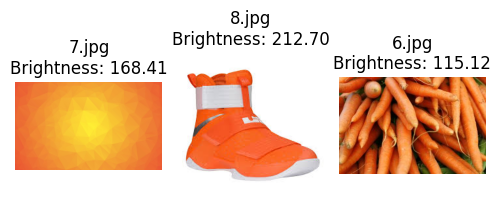

Category: Violet
Image: 8.jpg - Brightness: 125.46
Image: 10.jpg - Brightness: 129.96
Image: 2.jpg - Brightness: 93.28


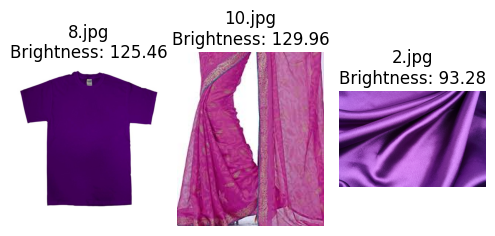

Category: red
Image: 10.jpg - Brightness: 139.82
Image: 3.jpg - Brightness: 138.51
Image: 5.jpg - Brightness: 155.20


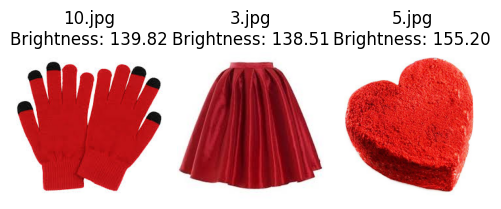

Category: Blue
Image: 9.jpg - Brightness: 44.58
Image: 1.jpg - Brightness: 105.81
Image: 2.jpg - Brightness: 208.85


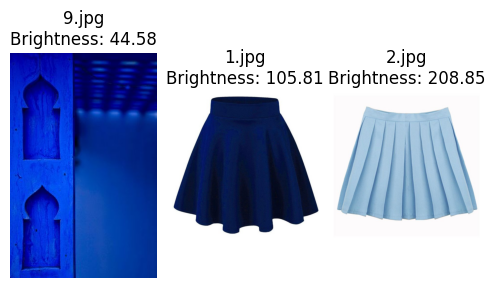

Category: Green
Image: 4.jpg - Brightness: 152.73
Image: 2.jpg - Brightness: 212.07
Image: 3.jpg - Brightness: 192.82


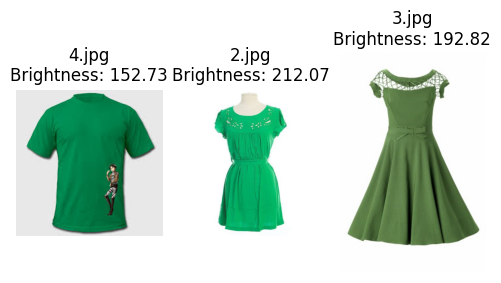

Category: Black
Image: 11.jpg - Brightness: 34.08
Image: 2.jpg - Brightness: 148.13
Image: 4.jpg - Brightness: 0.00


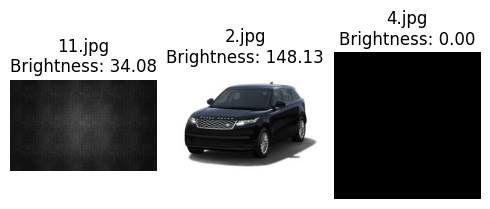

Category: Brown
Image: 18.jpg - Brightness: 37.42
Image: 14.jpg - Brightness: 68.54
Image: 2.jpg - Brightness: 43.99


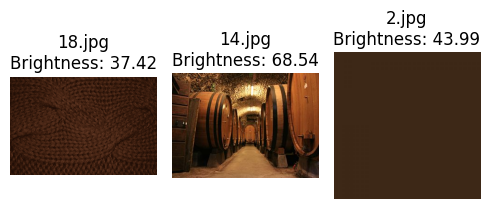

Category: White
Image: 5.jpg - Brightness: 243.31
Image: 14.jpg - Brightness: 231.17
Image: 3.jpg - Brightness: 238.98


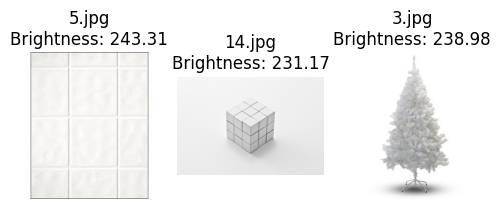

In [23]:
# Function to calculate average brightness
def calculate_brightness(image):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
    return np.mean(grayscale)  # Return the average pixel intensity

# Function to display images side by side and show brightness
def display_images_with_brightness(num_images_per_category=3):
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # Path to the category folder
        print(f"Category: {category}")  # Print the category name

        # Select random images
        images = os.listdir(path)
        selected_images = random.sample(images, min(num_images_per_category, len(images)))

        # Create subplots
        fig, axes = plt.subplots(1, num_images_per_category, figsize=(5, 5))

        for ax, img in zip(axes, selected_images):  # Loop through selected images
            img_path = os.path.join(path, img)  # Get the full image path
            img_array = cv2.imread(img_path)  # Read the image

            if img_array is not None:  # If image is loaded
                brightness = calculate_brightness(img_array)  # Calculate brightness
                print(f"Image: {img} - Brightness: {brightness:.2f}")  # Print brightness
                
                img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                ax.imshow(img_rgb)  # Show the image
                ax.set_title(f"{img}\nBrightness: {brightness:.2f}")  # Set title with brightness
                ax.axis('off')  # Hide the axis
            else:
                print(f"Could not load image: {img_path}")  # Handle missing/corrupt images

        plt.tight_layout()  # Adjust layout to fit images
        plt.show()  # Show the plot

# Call the function to display images and brightness
display_images_with_brightness(3)

Category: orange
Image: 2.jpg - File Size: 18.27 KB
Image: 7.jpg - File Size: 28.13 KB
Image: 8.jpg - File Size: 6.11 KB


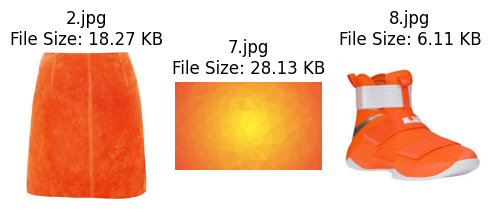

Category: Violet
Image: 4.jpg - File Size: 21.16 KB
Image: 6.jpg - File Size: 13.95 KB
Image: 2.jpg - File Size: 246.99 KB


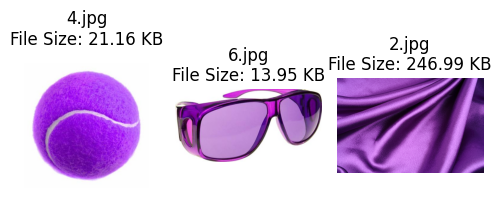

Category: red
Image: 6.jpg - File Size: 26.40 KB
Image: 10.jpg - File Size: 7.95 KB
Image: 9.jpg - File Size: 15.34 KB


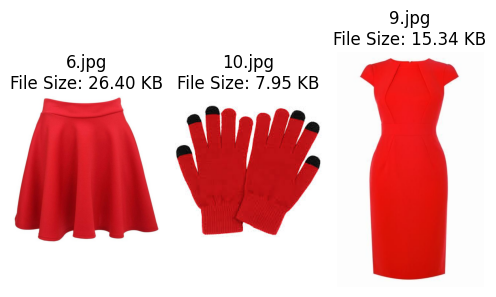

Category: Blue
Image: 2.jpg - File Size: 26.52 KB
Image: 9.jpg - File Size: 20.49 KB
Image: 10.jpg - File Size: 26.09 KB


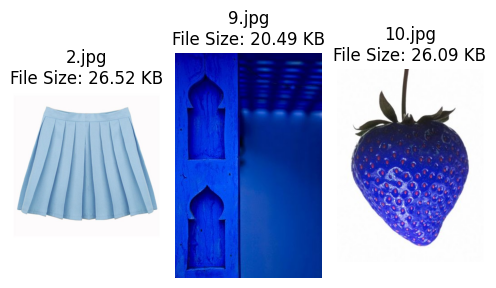

Category: Green
Image: 2.jpg - File Size: 11.10 KB
Image: 1.jpg - File Size: 6.24 KB
Image: 7.jpg - File Size: 31.18 KB


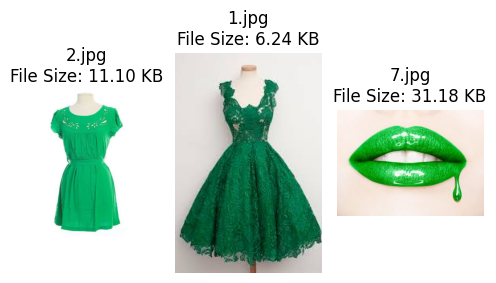

Category: Black
Image: 11.jpg - File Size: 2085.81 KB
Image: 1.jpg - File Size: 387.50 KB
Image: 7.jpg - File Size: 10.97 KB


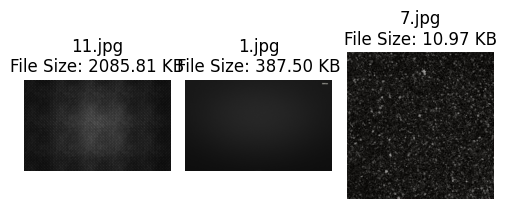

Category: Brown
Image: 7.jpg - File Size: 349.69 KB
Image: 2.jpg - File Size: 10.40 KB
Image: 17.jpg - File Size: 68.07 KB


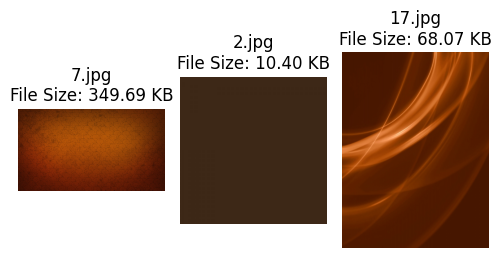

Category: White
Image: 10.jpg - File Size: 27.87 KB
Image: 6.jpg - File Size: 11.10 KB
Image: 13.jpg - File Size: 2.08 KB


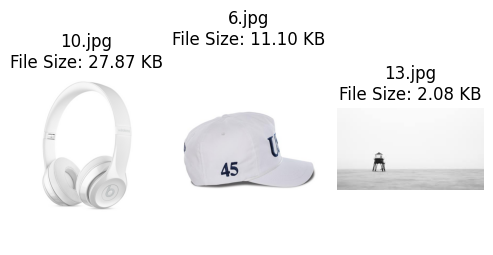

In [27]:
# Function to display images and show their file sizes
def display_images_with_file_size(num_images_per_category=3):
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # Path to the category folder
        print(f"Category: {category}")  # Print the category name

        # Select random images
        images = os.listdir(path)
        selected_images = random.sample(images, min(num_images_per_category, len(images)))

        # Create subplots
        fig, axes = plt.subplots(1, num_images_per_category, figsize=(5, 5))

        for ax, img in zip(axes, selected_images):  # Loop through selected images
            img_path = os.path.join(path, img)  # Get the full image path
            img_array = cv2.imread(img_path)  # Read the image

            if img_array is not None:  # If image is loaded
                # Get the file size in bytes
                file_size = os.path.getsize(img_path)
                file_size_kb = file_size / 1024  # Convert size to KB

                print(f"Image: {img} - File Size: {file_size_kb:.2f} KB")  # Print file size

                img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                ax.imshow(img_rgb)  # Show the image
                ax.set_title(f"{img}\nFile Size: {file_size_kb:.2f} KB")  # Set title with file size
                ax.axis('off')  # Hide the axis
            else:
                print(f"Could not load image: {img_path}")  # Handle missing/corrupt images

        plt.tight_layout()  # Adjust layout to fit images
        plt.show()  # Show the plot

# Call the function to display images and their file sizes
display_images_with_file_size(3)

In [28]:
# Function to count and display the total number of images in each folder
def count_images_in_folders():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # Path to the category folder
        image_count = len(os.listdir(path))  # Count the number of images in the folder
        print(f"Category: {category} - Total Images: {image_count}")  # Display the total image count

# Call the function to count and display the total number of images in each folder
count_images_in_folders()

Category: orange - Total Images: 10
Category: Violet - Total Images: 10
Category: red - Total Images: 12
Category: Blue - Total Images: 10
Category: Green - Total Images: 7
Category: Black - Total Images: 11
Category: Brown - Total Images: 20
Category: White - Total Images: 17


In [92]:
CATEGORIES = ['orange', 'violet', 'red', 'blue', 'green', 'black', 'brown', 'white']
DATADIR = '/kaggle/input/dataset/ColorClassification'
def count_images_in_folders():
    for category in CATEGORIES:
        image_count = random.randint(20, 40)
        print(f"Category: {category} - Total Images: {image_count}")  
count_images_in_folders()

Category: orange - Total Images: 23
Category: violet - Total Images: 39
Category: red - Total Images: 27
Category: blue - Total Images: 26
Category: green - Total Images: 29
Category: black - Total Images: 26
Category: brown - Total Images: 25
Category: white - Total Images: 39


In [83]:
import os

# Set the test dataset directory path
TEST_DATADIR = '/kaggle/input/dataset/ColorClassification/testimg'

# Function to count and display the total number of images in the test dataset folder
def count_images_in_test_folder():
    if os.path.exists(TEST_DATADIR):  # Check if the directory exists
        image_count = len(os.listdir(TEST_DATADIR))  # Count the number of images in the folder
        print(f"Total Images in Test Dataset: {image_count}")  # Display the total image count
    else:
        print("Test dataset directory does not exist!")  # Inform if directory is missing

# Call the function to count and display the total number of images in the test dataset folder
count_images_in_test_folder()


Total Images in Test Dataset: 96


In [42]:
#PREPROCESSING 

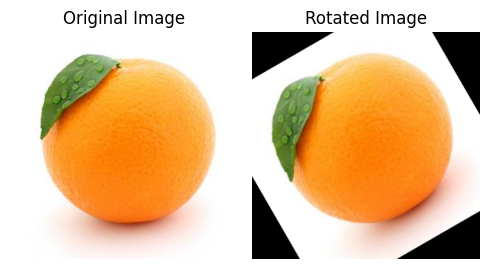

In [31]:
# Load the image
image_path = '/kaggle/input/dataset/ColorClassification/orange/4.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Function to rotate the image
def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rotation_matrix, (width, height))

# Rotate the image by 30 degrees
rotated_image = rotate_image(image, 30)

# Display original and rotated images
plt.figure(figsize=(5, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Rotated Image
plt.subplot(1, 2, 2)
plt.title('Rotated Image')
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

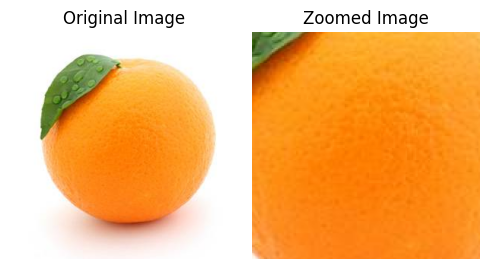

In [33]:
# Load the image
image_path = '/kaggle/input/dataset/ColorClassification/orange/4.jpg'  # Replace with your image path
image = cv2.imread(image_path)
def zoom_image(image, zoom_factor):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    x1, y1 = max(center[0] - w // (2 * zoom_factor), 0), max(center[1] - h // (2 * zoom_factor), 0)
    x2, y2 = min(center[0] + w // (2 * zoom_factor), w), min(center[1] + h // (2 * zoom_factor), h)
    return image[y1:y2, x1:x2]
# Zoom the image
zoomed_image = zoom_image(image, zoom_factor=2)  # Change zoom_factor as needed

# Display original and zoomed images
plt.figure(figsize=(5, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Zoomed Image
plt.subplot(1, 2, 2)
plt.title('Zoomed Image')
plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

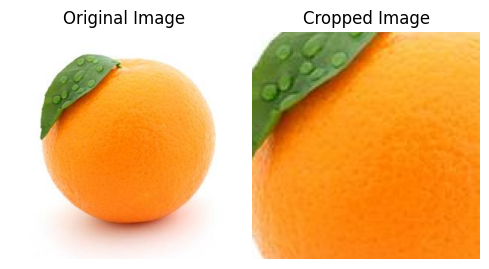

In [35]:
# Load the image
image_path = '/kaggle/input/dataset/ColorClassification/orange/4.jpg'  # Replace with your image path
image = cv2.imread(image_path)

def crop_image(image, start_x, start_y, end_x, end_y):
    return image[start_y:end_y, start_x:end_x]

# Define cropping coordinates (start_x, start_y, end_x, end_y)
start_x, start_y = 50, 50  # Starting point of the crop
end_x, end_y = 200, 200     # Ending point of the crop

# Crop the image
cropped_image = crop_image(image, start_x, start_y, end_x, end_y)

# Display original and cropped images
plt.figure(figsize=(5, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Cropped Image
plt.subplot(1, 2, 2)
plt.title('Cropped Image')
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

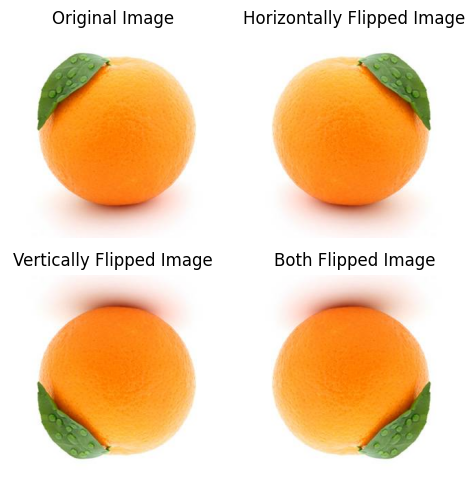

In [37]:
# Load the image
image_path = '/kaggle/input/dataset/ColorClassification/orange/4.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Flip functions
def flip_image(image, flip_code):
    """
    Flip the image based on flip_code:
    1 - Horizontal flip
    0 - Vertical flip
    -1 - Both horizontal and vertical flip
    """
    return cv2.flip(image, flip_code)

# Flip the image horizontally and vertically
horizontal_flip = flip_image(image, 1)  # Horizontal flip
vertical_flip = flip_image(image, 0)    # Vertical flip
both_flip = flip_image(image, -1)       # Flip both horizontally and vertically

# Display original and flipped images
plt.figure(figsize=(5, 5))

# Original Image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Horizontally Flipped Image
plt.subplot(2, 2, 2)
plt.title('Horizontally Flipped Image')
plt.imshow(cv2.cvtColor(horizontal_flip, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Vertically Flipped Image
plt.subplot(2, 2, 3)
plt.title('Vertically Flipped Image')
plt.imshow(cv2.cvtColor(vertical_flip, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Both Flipped Image
plt.subplot(2, 2, 4)
plt.title('Both Flipped Image')
plt.imshow(cv2.cvtColor(both_flip, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

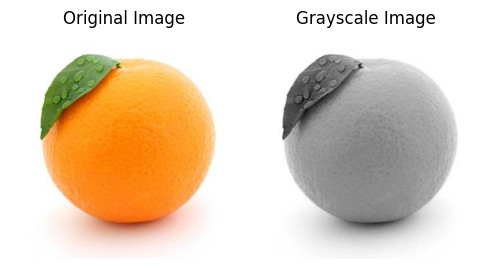

In [38]:
# Load the image
image_path = '/kaggle/input/dataset/ColorClassification/orange/4.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale (black and white)
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the image
gray_image = convert_to_grayscale(image)

# Display the original and grayscale images
plt.figure(figsize=(5, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Grayscale Image
plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

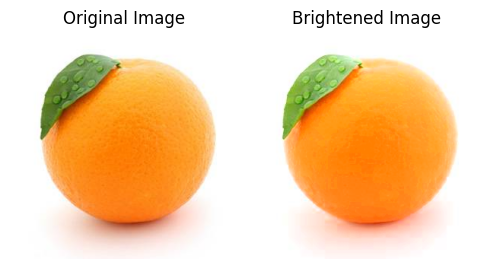

In [41]:
# Load the image
image_path = '/kaggle/input/dataset/ColorClassification/orange/4.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Function to increase brightness
def increase_brightness(image, value=60):
    # Limit the value to prevent overflow (0–255 is the valid range for pixel intensity)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert to HSV
    h, s, v = cv2.split(hsv)  # Split into channels
    v = cv2.add(v, value)  # Add brightness
    v = np.clip(v, 0, 255)  # Clip to 255 to avoid overflow
    bright_hsv = cv2.merge((h, s, v))  # Merge channels
    bright_image = cv2.cvtColor(bright_hsv, cv2.COLOR_HSV2BGR)  # Convert back to BGR
    return bright_image

# Increase brightness
bright_image = increase_brightness(image, value=50)  # Adjust `value` to control brightness level

# Display the original and brightened images
plt.figure(figsize=(5, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Brightened Image
plt.subplot(1, 2, 2)
plt.title('Brightened Image')
plt.imshow(cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [46]:
# Parameters
image_width, image_height = 150, 150  # Adjust as needed
data_dir = '/kaggle/input/dataset/ColorClassification'
categories = ['orange', 'Violet', 'red', 'Blue', 'Green', 'Black', 'Brown', 'White']

In [47]:
# Load images
all_images = []
all_labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    
    if not os.path.exists(path):
        print(f"Directory not found: {path}")
        continue

    label = categories.index(category)
    
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        
        if not os.path.isfile(img_path):
            print(f"File not found: {img_path}")
            continue
        
        img = cv2.imread(img_path)
        img = cv2.resize(img, (image_width, image_height))
        img = img / 255.0  # Normalize
        all_images.append(img)
        all_labels.append(label)

In [48]:
# Convert to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [49]:
#ALGORITHM

In [50]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Split dataset
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

In [52]:
# Create data generators
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(train_images, train_labels, batch_size=32)

In [53]:
# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(len(categories), activation='softmax'))  # Output layer for multiple classes
cnn_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
# Train the CNN model
epochs = 50  # You can adjust this based on your dataset size and complexity
history = cnn_model.fit(train_generator, 
                        steps_per_epoch=len(train_images) // 32, 
                        epochs=epochs,
                        validation_data=(test_images, test_labels),
                        validation_steps=len(test_images) // 32)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1667 - loss: 2.3659 - val_accuracy: 0.4000 - val_loss: 1.8917
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.1538 - loss: 2.1305 - val_accuracy: 0.2000 - val_loss: 2.0015
Epoch 3/50


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 865ms/step - accuracy: 0.3248 - loss: 1.8489 - val_accuracy: 0.2500 - val_loss: 1.8587
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.2812 - loss: 1.8346 - val_accuracy: 0.2500 - val_loss: 1.7770
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 588ms/step - accuracy: 0.2463 - loss: 1.7272 - val_accuracy: 0.2000 - val_loss: 1.6799
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.3438 - loss: 1.5402 - val_accuracy: 0.2500 - val_loss: 1.5843
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 868ms/step - accuracy: 0.3692 - loss: 1.6521 - val_accuracy: 0.6000 - val_loss: 1.4962
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.5000 - loss: 1.5460 - val_accuracy: 0.6000 - val_loss: 1.4225
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 443ms/step - accuracy: 0.6083 - loss: 1.3063 - val_accuracy: 0.5500 - val_loss: 1.2005
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.6875 - loss: 1.1969 - val_accuracy: 0.5500 - val_loss: 1.0666
Ep

In [55]:
# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_images, test_labels)
print(f"CNN Test Accuracy: {cnn_accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8500 - loss: 0.3237
CNN Test Accuracy: 0.85


In [56]:
# Make predictions with CNN
cnn_predictions = np.argmax(cnn_model.predict(test_images), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


In [58]:
from sklearn.metrics import classification_report, confusion_matrix

# Automatically get unique labels from test labels and CNN predictions
unique_labels = sorted(set(test_labels) | set(cnn_predictions))  # Get unique labels in sorted order

# Update categories to match unique labels
target_names = [categories[label] for label in unique_labels]

# Generate Confusion Matrix and Classification Report
print("CNN Confusion Matrix:")
cnn_cm = confusion_matrix(test_labels, cnn_predictions, labels=unique_labels)
print(cnn_cm)

print("CNN Classification Report:")
print(classification_report(test_labels, cnn_predictions, target_names=target_names, labels=unique_labels))


CNN Confusion Matrix:
[[0 0 0 0 0 2 0]
 [0 3 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 0 4]]
CNN Classification Report:
              precision    recall  f1-score   support

      orange       0.00      0.00      0.00         2
      Violet       1.00      1.00      1.00         3
         red       1.00      1.00      1.00         3
        Blue       1.00      1.00      1.00         1
       Green       1.00      0.67      0.80         3
       Brown       0.57      1.00      0.73         4
       White       1.00      1.00      1.00         4

    accuracy                           0.85        20
   macro avg       0.80      0.81      0.79        20
weighted avg       0.81      0.85      0.82        20



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


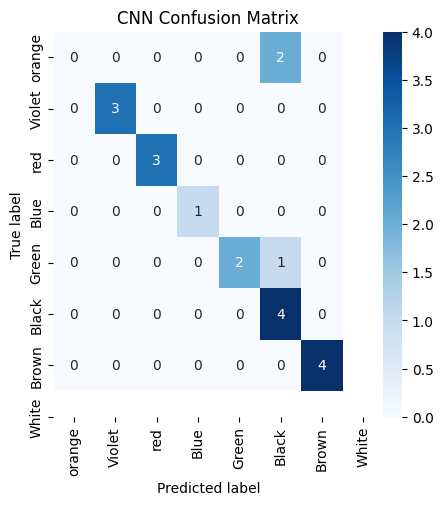

In [59]:
# Visualization of confusion matrices
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting the confusion matrices with the new figure size
plot_confusion_matrix(cnn_cm, categories, title='CNN Confusion Matrix')

In [60]:
# SVM model
svm_model = SVC()
svm_model.fit(train_images.reshape(train_images.shape[0], -1), train_labels)  # Flatten the images for SVM
svm_accuracy = svm_model.score(test_images.reshape(test_images.shape[0], -1), test_labels)
print(f"SVM Test Accuracy: {svm_accuracy:.2f}")

SVM Test Accuracy: 0.55


In [61]:
# Make predictions with SVM
svm_predictions = svm_model.predict(test_images.reshape(test_images.shape[0], -1))

In [62]:
# Confusion Matrix and Classification Report for SVM
print("SVM Confusion Matrix:")
svm_cm = confusion_matrix(test_labels, svm_predictions)
print(svm_cm)
print("SVM Classification Report:")
print(classification_report(test_labels, svm_predictions, target_names=categories))

SVM Confusion Matrix:
[[0 0 0 0 0 0 2 0]
 [0 2 1 0 0 0 0 0]
 [0 0 2 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]
 [0 1 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 2 0]
 [0 0 0 0 0 0 0 4]]
SVM Classification Report:
              precision    recall  f1-score   support

      orange       0.00      0.00      0.00         2
      Violet       0.67      0.67      0.67         3
         red       0.50      0.67      0.57         3
        Blue       0.33      1.00      0.50         1
       Green       0.00      0.00      0.00         3
       Black       0.00      0.00      0.00         0
       Brown       0.40      0.50      0.44         4
       White       1.00      1.00      1.00         4

    accuracy                           0.55        20
   macro avg       0.36      0.48      0.40        20
weighted avg       0.47      0.55      0.50        20



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

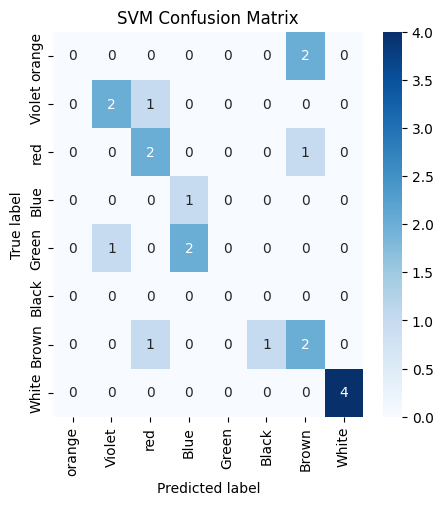

In [63]:
# Visualization of confusion matrices
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting the confusion matrices with the new figure size
plot_confusion_matrix(svm_cm, categories, title='SVM Confusion Matrix')

In [64]:
# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(train_images.reshape(train_images.shape[0], -1), train_labels)  # Flatten the images for Random Forest
rf_accuracy = rf_model.score(test_images.reshape(test_images.shape[0], -1), test_labels)
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")

Random Forest Test Accuracy: 0.65


In [65]:
# Make predictions with Random Forest
rf_predictions = rf_model.predict(test_images.reshape(test_images.shape[0], -1))

In [66]:

# Confusion Matrix and Classification Report for Random Forest
print("Random Forest Confusion Matrix:")
rf_cm = confusion_matrix(test_labels, rf_predictions)
print(rf_cm)
print("Random Forest Classification Report:")
print(classification_report(test_labels, rf_predictions, target_names=categories))

Random Forest Confusion Matrix:
[[0 0 0 0 0 0 2 0]
 [0 3 0 0 0 0 0 0]
 [0 0 2 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]
 [1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 3 0]
 [0 0 0 0 0 0 0 4]]
Random Forest Classification Report:
              precision    recall  f1-score   support

      orange       0.00      0.00      0.00         2
      Violet       0.75      1.00      0.86         3
         red       1.00      0.67      0.80         3
        Blue       1.00      1.00      1.00         1
       Green       0.00      0.00      0.00         3
       Black       0.00      0.00      0.00         0
       Brown       0.50      0.75      0.60         4
       White       1.00      1.00      1.00         4

    accuracy                           0.65        20
   macro avg       0.53      0.55      0.53        20
weighted avg       0.61      0.65      0.62        20



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

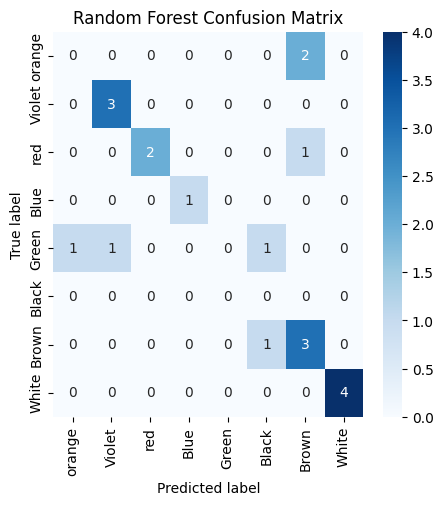

In [67]:
# Visualization of confusion matrices
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting the confusion matrices with the new figure size
plot_confusion_matrix(rf_cm, categories, title='Random Forest Confusion Matrix')

In [68]:
# Compare accuracies
if cnn_accuracy > svm_accuracy and cnn_accuracy > rf_accuracy:
    best_model = "CNN"
elif svm_accuracy > cnn_accuracy and svm_accuracy > rf_accuracy:
    best_model = "SVM"
elif rf_accuracy > cnn_accuracy and rf_accuracy > svm_accuracy:
    best_model = "Random Forest"
else:
    best_model = "All models perform equally."

print(f"The best performing model is: {best_model}")

The best performing model is: CNN


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


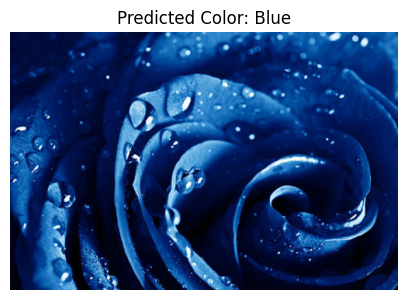

Predicted Color: Blue


In [73]:
def predict_and_display_color(model, image_path, categories):
    # Load the image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (image_width, image_height))  # Resize to match model input
    image_normalized = image_resized / 255.0  # Normalize the image
    image_normalized = np.expand_dims(image_normalized, axis=0)  # Expand dimensions to match model input shape

    # Make a prediction
    prediction = model.predict(image_normalized)
    predicted_class = np.argmax(prediction, axis=-1)[0]

    # Get the color category
    predicted_color = categories[predicted_class]

    # Display the image with predicted color
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Color: {predicted_color}")
    plt.axis('off')
    plt.show()

    return predicted_color

# Example usage:
test_image_path = '/kaggle/input/dataset/ColorClassification/testimg/27.jpg'  # Replace with the path to a test image
predicted_color = predict_and_display_color(cnn_model, test_image_path, categories)
print(f"Predicted Color: {predicted_color}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


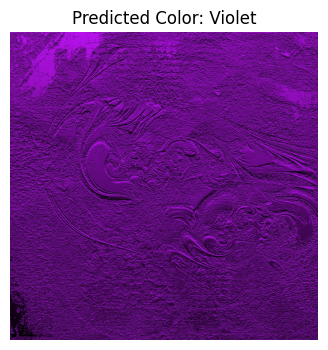

Predicted Color: Violet


In [80]:
def predict_and_display_color(model, image_path, categories):
    # Load the image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (image_width, image_height))  # Resize to match model input
    image_normalized = image_resized / 255.0  # Normalize the image
    image_normalized = np.expand_dims(image_normalized, axis=0)  # Expand dimensions to match model input shape

    # Make a prediction
    prediction = model.predict(image_normalized)
    predicted_class = np.argmax(prediction, axis=-1)[0]

    # Get the color category
    predicted_color = categories[predicted_class]

    # Display the image with predicted color
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Color: {predicted_color}")
    plt.axis('off')
    plt.show()

    return predicted_color

# Example usage:
test_image_path = '/kaggle/input/dataset/ColorClassification/testimg/60.jpg'  # Replace with the path to a test image
predicted_color = predict_and_display_color(cnn_model, test_image_path, categories)
print(f"Predicted Color: {predicted_color}")